# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [3]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

from sklearn import preprocessing
from nltk.corpus import opinion_lexicon
from nltk import pos_tag
from sklearn.model_selection import train_test_split
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import seaborn as sns
import advertools as adv

In [4]:




# Place any addtional functions or constants you need here. 


punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")


whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    
    return(0)


    
def is_emoji(s):
    return(s in all_language_emojis)

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. 
    """
    
    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [5]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/navaroohi/Desktop/txt mining/GitHub/ADS509-Applied-Text-Mining"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"


positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

In [6]:
artist_files = {'Coldplay':'Coldplay_follower_data.txt',
'damienrice':'damienrice_follower_data.txt'}

In [7]:
twitter_data = pd.read_csv(twitter_folder + artist_files['Coldplay'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "Coldplay"

In [8]:
twitter_data_2 = pd.read_csv(twitter_folder + artist_files['damienrice'],
                             sep="\t",
                             quoting=3)

twitter_data_2['artist'] = "damienrice"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [9]:
# Read in the lyrics data

artist_folders = os.listdir(lyrics_folder)
artist_folders = [f for f in artist_folders if os.path.isdir(lyrics_folder + f)]
lyrics_final = pd.DataFrame(columns=['artist', 'title', 'lyrics'])

for artist in artist_folders:
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]
    
    for f_name in artist_files:
        with open("lyrics/" + artist + "/" + f_name) as infile :
            title = infile.readline()
            infile.close()
        with open("lyrics/" + artist + "/" + f_name) as infile :
            next(infile)
            next(infile)
            lyrics = infile.read()
            infile.close()
        
        new_row = {'artist': artist, 'title': title, 'lyrics': lyrics}
        lyrics_final = lyrics_final.append(new_row, ignore_index = True)


<ipython-input-9-32306bc3f15a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lyrics_final = lyrics_final.append(new_row, ignore_index = True)
<ipython-input-9-32306bc3f15a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lyrics_final = lyrics_final.append(new_row, ignore_index = True)
<ipython-input-9-32306bc3f15a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lyrics_final = lyrics_final.append(new_row, ignore_index = True)
<ipython-input-9-32306bc3f15a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lyrics_final = lyrics_final.append(new_row, ignore_index = True)
<ipython-input-9-32306bc3f15a>:22: FutureWarning: The frame.

In [10]:
# Read in the twitter data

artist_handles = ['Coldplay','damienrice']
twitter_descriptions_emoji = {}

for artist in artist_handles :
    follower_data_file = artist + "_follower_data.txt"
    
    with open("twitter/" + follower_data_file, encoding = 'UTF-8') as infile :
        
        description_words = []
        description_words_emoji = []
        description_words_hashtag = []
        
        for idx, line in enumerate(infile.readlines()) :
            line = line.strip("\n").split("\t")
            
            try :           
                description_words_emoji.extend(line[5])
            except :
                pass
        
        twitter_descriptions_emoji[artist] = ' '.join(description_words_emoji)


In [11]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

positive = pd.read_csv(positive_words_file, skiprows = 35, header = None,encoding='latin-1')
positive['sentiment'] = 1
negative = pd.read_csv(negative_words_file, skiprows = 35, header = None,encoding='latin-1')
negative['sentiment'] = -1
tidytext = pd.read_csv(tidy_text_file, sep = '\t')
tidytext.loc[tidytext.sentiment == 'negative', 'sentiment'] = -1
tidytext.loc[tidytext.sentiment == 'positive', 'sentiment'] = 1
tidytext_nrc = tidytext[tidytext['lexicon']=='nrc']
tidytext_bing = tidytext[tidytext['lexicon']=='bing']
tidytext_loughran = tidytext[tidytext['lexicon']=='loughran']



## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [12]:
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
        
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
        
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

# cleaning def

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = [x for x in text if x not in sw]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [13]:
lyrics_final['clean_lyrics'] = lyrics_final['lyrics'].apply(clean_text)
lyrics_final = lyrics_final[lyrics_final['clean_lyrics'].str.len() != 0]

In [14]:
# finding Bing Liu Score for each song
lyrics_final['Bing_Liu_Score'] = lyrics_final['clean_lyrics'].apply(bing_liu_score)
lyrics_final

,artist,title,lyrics,clean_lyrics,Bing_Liu_Score
0,Coldplay,Coldplay - Such A Rush Lyrics | AZLyrics.com\n,Such a rush to do nothing at all\nSuch a fuss ...,rush nothing all\nsuch fuss nothing all\nsuch ...,-0.031915
1,Coldplay,Coldplay - High Speed Lyrics | AZLyrics.com\n,Can anybody fly this thing\nBefore my head exp...,anybody fly thing\nbefore head explodes\nor he...,0.085714
2,Coldplay,Coldplay - Bigger Stronger Lyrics | AZLyrics.c...,"I wanna be bigger, stronger, drive a faster ca...",wanna big strong drive faster car\nto take any...,0.090323
3,Coldplay,Coldplay - Don't Panic Lyrics | AZLyrics.com\n,Bones sinking like stones\nAll that we fought ...,bone sink like stones\nall fight for\nhomes pl...,0.088608
4,Coldplay,Coldplay - See You Soon Lyrics | AZLyrics.com\n,So you lost your trust\nAnd you never should h...,lose trust\nand never have\nyou never have\n\n...,0.000000
5,Damien_Rice,Damien Rice - Delicate Lyrics | AZLyrics.com\n,We might kiss when we are alone\nWhen nobody's...,might kiss alone\nwhen nobody's watching\nwe m...,0.009346
6,Damien_Rice,Damien Rice - Older Chests Lyrics | AZLyrics.c...,Older chests reveal themselves\nLike a crack i...,old chest reveal themselves\nlike crack wall\n...,0.000000
7,Damien_Rice,Damien Rice - Volcano Lyrics | AZLyrics.com\n,Don't hold yourself like that\nYou'll hurt you...,hold like that\nyou'll hurt knees\ni kiss mout...,0.016667
8,Damien_Rice,Damien Rice - Cannonball Lyrics | AZLyrics.com\n,Still a little bit of your taste in my mouth\n...,still little bit taste mouth\nstill little bit...,-0.088889
9,Damien_Rice,Damien Rice - The Blower's Daughter Lyrics | A...,And so it is\nJust like you said it would be\n...,is\njust like say would be\nlife go easy me\nm...,0.028249


In [15]:
lyrics_final['Bing_Liu_Score'] = preprocessing.scale(lyrics_final['Bing_Liu_Score'])
lyrics_final.groupby('artist').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
artist,
Coldplay,0.492121
Damien_Rice,-0.492121


In [16]:
# Highest scores for Coldplay
lyrics_final[lyrics_final['artist']=='Coldplay'].nlargest(n=5, columns = ['Bing_Liu_Score'])

,artist,title,lyrics,clean_lyrics,Bing_Liu_Score
2,Coldplay,Coldplay - Bigger Stronger Lyrics | AZLyrics.c...,"I wanna be bigger, stronger, drive a faster ca...",wanna big strong drive faster car\nto take any...,1.297911
3,Coldplay,Coldplay - Don't Panic Lyrics | AZLyrics.com\n,Bones sinking like stones\nAll that we fought ...,bone sink like stones\nall fight for\nhomes pl...,1.266344
1,Coldplay,Coldplay - High Speed Lyrics | AZLyrics.com\n,Can anybody fly this thing\nBefore my head exp...,anybody fly thing\nbefore head explodes\nor he...,1.213087
4,Coldplay,Coldplay - See You Soon Lyrics | AZLyrics.com\n,So you lost your trust\nAnd you never should h...,lose trust\nand never have\nyou never have\n\n...,-0.364643
0,Coldplay,Coldplay - Such A Rush Lyrics | AZLyrics.com\n,Such a rush to do nothing at all\nSuch a fuss ...,rush nothing all\nsuch fuss nothing all\nsuch ...,-0.952096


In [17]:
# Highest scores for Damien Rice
lyrics_final[lyrics_final['artist']=='Damien_Rice'].nlargest(n=5, columns = ['Bing_Liu_Score'])

,artist,title,lyrics,clean_lyrics,Bing_Liu_Score
9,Damien_Rice,Damien Rice - The Blower's Daughter Lyrics | A...,And so it is\nJust like you said it would be\n...,is\njust like say would be\nlife go easy me\nm...,0.155325
7,Damien_Rice,Damien Rice - Volcano Lyrics | AZLyrics.com\n,Don't hold yourself like that\nYou'll hurt you...,hold like that\nyou'll hurt knees\ni kiss mout...,-0.057862
5,Damien_Rice,Damien Rice - Delicate Lyrics | AZLyrics.com\n,We might kiss when we are alone\nWhen nobody's...,might kiss alone\nwhen nobody's watching\nwe m...,-0.192616
6,Damien_Rice,Damien Rice - Older Chests Lyrics | AZLyrics.c...,Older chests reveal themselves\nLike a crack i...,old chest reveal themselves\nlike crack wall\n...,-0.364643
8,Damien_Rice,Damien Rice - Cannonball Lyrics | AZLyrics.com\n,Still a little bit of your taste in my mouth\n...,still little bit taste mouth\nstill little bit...,-2.000807


In [18]:

lyrics_final[lyrics_final['artist']=='Coldplay'].nsmallest(n=5, columns = ['Bing_Liu_Score'])

,artist,title,lyrics,clean_lyrics,Bing_Liu_Score
0,Coldplay,Coldplay - Such A Rush Lyrics | AZLyrics.com\n,Such a rush to do nothing at all\nSuch a fuss ...,rush nothing all\nsuch fuss nothing all\nsuch ...,-0.952096
4,Coldplay,Coldplay - See You Soon Lyrics | AZLyrics.com\n,So you lost your trust\nAnd you never should h...,lose trust\nand never have\nyou never have\n\n...,-0.364643
1,Coldplay,Coldplay - High Speed Lyrics | AZLyrics.com\n,Can anybody fly this thing\nBefore my head exp...,anybody fly thing\nbefore head explodes\nor he...,1.213087
3,Coldplay,Coldplay - Don't Panic Lyrics | AZLyrics.com\n,Bones sinking like stones\nAll that we fought ...,bone sink like stones\nall fight for\nhomes pl...,1.266344
2,Coldplay,Coldplay - Bigger Stronger Lyrics | AZLyrics.c...,"I wanna be bigger, stronger, drive a faster ca...",wanna big strong drive faster car\nto take any...,1.297911


In [19]:
lyrics_final[lyrics_final['artist']=='Damien_Rice'].nsmallest(n=5, columns = ['Bing_Liu_Score'])

,artist,title,lyrics,clean_lyrics,Bing_Liu_Score
8,Damien_Rice,Damien Rice - Cannonball Lyrics | AZLyrics.com\n,Still a little bit of your taste in my mouth\n...,still little bit taste mouth\nstill little bit...,-2.000807
6,Damien_Rice,Damien Rice - Older Chests Lyrics | AZLyrics.c...,Older chests reveal themselves\nLike a crack i...,old chest reveal themselves\nlike crack wall\n...,-0.364643
5,Damien_Rice,Damien Rice - Delicate Lyrics | AZLyrics.com\n,We might kiss when we are alone\nWhen nobody's...,might kiss alone\nwhen nobody's watching\nwe m...,-0.192616
7,Damien_Rice,Damien Rice - Volcano Lyrics | AZLyrics.com\n,Don't hold yourself like that\nYou'll hurt you...,hold like that\nyou'll hurt knees\ni kiss mout...,-0.057862
9,Damien_Rice,Damien Rice - The Blower's Daughter Lyrics | A...,And so it is\nJust like you said it would be\n...,is\njust like say would be\nlife go easy me\nm...,0.155325


### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: <!-- Your answer here -->Coldplay

---

Q: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: <!-- Your answer here --> Coldplay(highest): Bigger stronger , Don't panic. Coldplay(lowest): such a rush, see you soon. 


---

Q: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: <!-- Your answer here -->Damien Rice(highest):The Blower's Daughter, Volcano. lowest songs are Cannonball,Older Chests.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




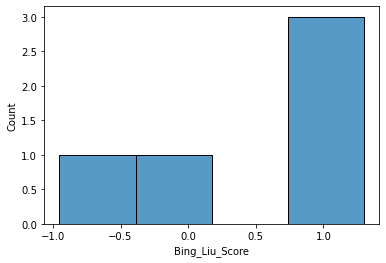

In [20]:
sns.histplot(data = lyrics_final[lyrics_final['artist']=='Coldplay'], x = 'Bing_Liu_Score')

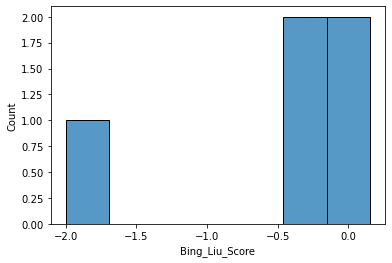

In [21]:
sns.histplot(data = lyrics_final[lyrics_final['artist']=='Damien_Rice'], x = 'Bing_Liu_Score')

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

In [22]:
# your code here
# pulling emojis from twitter data
allemogis = {}

for i in artist_handles:
    emoji_summary = adv.extract_emoji(twitter_descriptions_emoji[i])
    allemogis[i] = emoji_summary['emoji_text']


In [23]:


df = pd.DataFrame(allemogis.items(), columns=['artist', 'emojis'])
s = df.apply(lambda x: pd.Series(x['emojis']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'emoji'
emoji_df = df.drop('emojis', axis=1).join(s)
emoji_df = emoji_df[emoji_df['emoji'].str.len() != 0]
emoji_df['emoji'] = emoji_df['emoji'].str[0]
emoji_df

,artist,emoji
0,Coldplay,sparkles
0,Coldplay,new moon
0,Coldplay,books
0,Coldplay,brain
0,Coldplay,face savoring food
...,...,...
1,damienrice,headphone
1,damienrice,ticket
1,damienrice,ticket
1,damienrice,sun


In [24]:
emoji_df['emoji'].value_counts()[:60].sort_values(ascending=False)


purple heart                      235
red heart                         183
sparkles                          162
rainbow                            85
blue heart                         68
white flag                         61
musical notes                      54
heart suit                         51
black heart                        51
fire                               48
books                              45
woman                              43
green heart                        40
folded hands                       40
yellow heart                       36
two hearts                         36
white heart                        35
growing heart                      35
smiling face with hearts           33
high voltage                       33
dizzy                              31
sun                                31
female sign                        29
guitar                             29
black small square                 29
headphone                          29
male sign   

In [25]:
top_emojis = {'smiling face with smiling eyes ': 1, 'purple heart': 1, 'rainbow': 1, 
                    'skull': -1, 'black small square ': -1, 'smiling face with hearts': 1, 'dizzy': -1, 
                    'two hearts': 1, 'Person Frowning': -1,
                    'red heart': 1, 'sad but relieved face': -1, 'black flag': -1, 'Worried Face': -1, 
                    'Loudly Crying Face': -1, 'warning':-1, 'black heart ': -1, 'kissing face':1, 
                    'handshake': 1, 'sparkles': 1, 'growing heart': 1,"umbrella with rain drops":-1	}
 

In [26]:

emoji_sentiment = pd.Series(top_emojis)
emoji_sentiment_df = pd.DataFrame({'sentiment':emoji_sentiment .values, 'emoji':emoji_sentiment.index})
emoji_sentiment_df           
   

,sentiment,emoji
0,1,smiling face with smiling eyes
1,1,purple heart
2,1,rainbow
3,-1,skull
4,-1,black small square
5,1,smiling face with hearts
6,-1,dizzy
7,1,two hearts
8,-1,Person Frowning
9,1,red heart


In [27]:
final_emoji= pd.merge(emoji_df,emoji_sentiment_df , on ='emoji', how = 'left')
final_emoji.sentiment = final_emoji.sentiment.fillna(0)
final_emoji.head(20)
# print(final_emoji.to_markdown())

,artist,emoji,sentiment
0,Coldplay,sparkles,1.0
1,Coldplay,new moon,0.0
2,Coldplay,books,0.0
3,Coldplay,brain,0.0
4,Coldplay,face savoring food,0.0
5,Coldplay,skull,-1.0
6,Coldplay,skull,-1.0
7,Coldplay,growing heart,1.0
8,Coldplay,honeybee,0.0
9,Coldplay,musical notes,0.0


Q: What is the average sentiment of your two artists? 

The average sentiment score for coldplay is 0.20 & the average sentiment score for Damien rice was 0.09

In [28]:
#Average sentiment for coldplay
coldplay_emoji = final_emoji[final_emoji['artist']=='Coldplay']
coldplay_emoji['sentiment'].sum() / len(coldplay_emoji['sentiment'])

0.20090805902383654

In [29]:
damienrice_emoji = final_emoji[final_emoji['artist']=='damienrice']
damienrice_emoji['sentiment'].sum() / len(damienrice_emoji['sentiment'])

0.09851936218678815

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: The most popular positive emoji for Coldplay was Purple heart and the most popular negative was black heart.
The most popular positive emoji for damien rice was red heart and the most popular negaive emoji was black flag


In [30]:
coldplay_emoji['emoji'].value_counts()[0:15]

purple heart     206
sparkles         122
red heart        113
blue heart        40
rainbow           39
black heart       38
fire              38
growing heart     30
green heart       29
musical notes     29
heart suit        27
two hearts        27
white heart       27
white flag        25
folded hands      24
Name: emoji, dtype: int64

In [31]:
damienrice_emoji['emoji'].value_counts()[0:20]

red heart         70
rainbow           46
sparkles          40
white flag        36
purple heart      29
blue heart        28
musical notes     25
heart suit        24
books             22
black flag        22
guitar            20
woman             19
male sign         17
folded hands      16
female sign       16
sun               15
laptop            14
graduation cap    14
high voltage      14
yellow heart      14
Name: emoji, dtype: int64

In [32]:
pwd

'/Users/navaroohi/Desktop/txt mining/GitHub/ADS509-Applied-Text-Mining'